# Module 6.3 — Drawdown Across Horizons
## Objective
To analyze how drawdown characteristics change depending on evaluation frequency.

using a single long IID Gaussian simulation, we compute drawdowns at: 

- Trade-level resolution
- Weekly aggregation
- Monthly aggregation

We compare:

1. Maximum drawdown
2. Drawdown duration
3. Perceived severity

Key Question:   
How does evaluation horizon affect perceived risk?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#np.random.seed(42)

n = 2000
mu = 0.001
sigma = 0.02
initial_equity = 1.0

returns = np.random.normal(mu, sigma, n)

equity = initial_equity * np.cumprod(1 + returns)

df = pd.DataFrame({
    'returns': returns,
    'equity': equity
})


## Aggregate to weekly and monthly

In [3]:
weekly_returns = df.groupby(np.arange(len(df)) // 5)['returns'].sum()
monthly_returns = df.groupby(np.arange(len(df)) // 21)['returns'].sum()

weekly_equity = initial_equity * np.cumprod(1 + weekly_returns)
monthly_equity = initial_equity * np.cumprod(1 + monthly_returns)

## Drawdown function

In [4]:
def drawdown(equity):
    peak = np.maximum.accumulate(equity)
    dd = (equity - peak) / peak

    return dd


In [5]:
dd_trade = drawdown(df['equity'])
dd_weekly = drawdown(weekly_equity)
dd_monthly = drawdown(monthly_equity)

print("Max Drawdown (Trade):", round(dd_trade.min(), 4))
print("Max Drawdown (Weekly):", round(dd_weekly.min(), 4))
print("Max Drawdown (Monthly):", round(dd_monthly.min(), 4))

Max Drawdown (Trade): -0.3171
Max Drawdown (Weekly): -0.2998
Max Drawdown (Monthly): -0.271


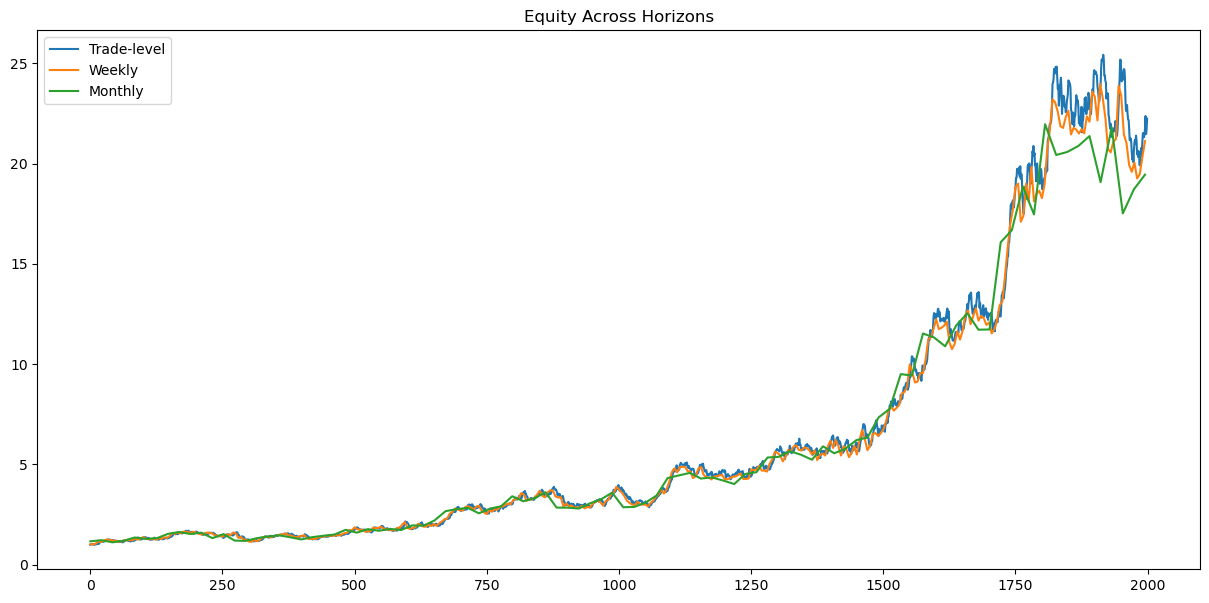

In [6]:
plt.figure(figsize = (15, 7))
plt.plot(df['equity'], label = 'Trade-level')
plt.plot(np.arange(0, len(weekly_equity)*5, 5), weekly_equity, label="Weekly")
plt.plot(np.arange(0, len(monthly_equity)*21, 21), monthly_equity, label="Monthly")
plt.title("Equity Across Horizons")
plt.legend()
plt.show()

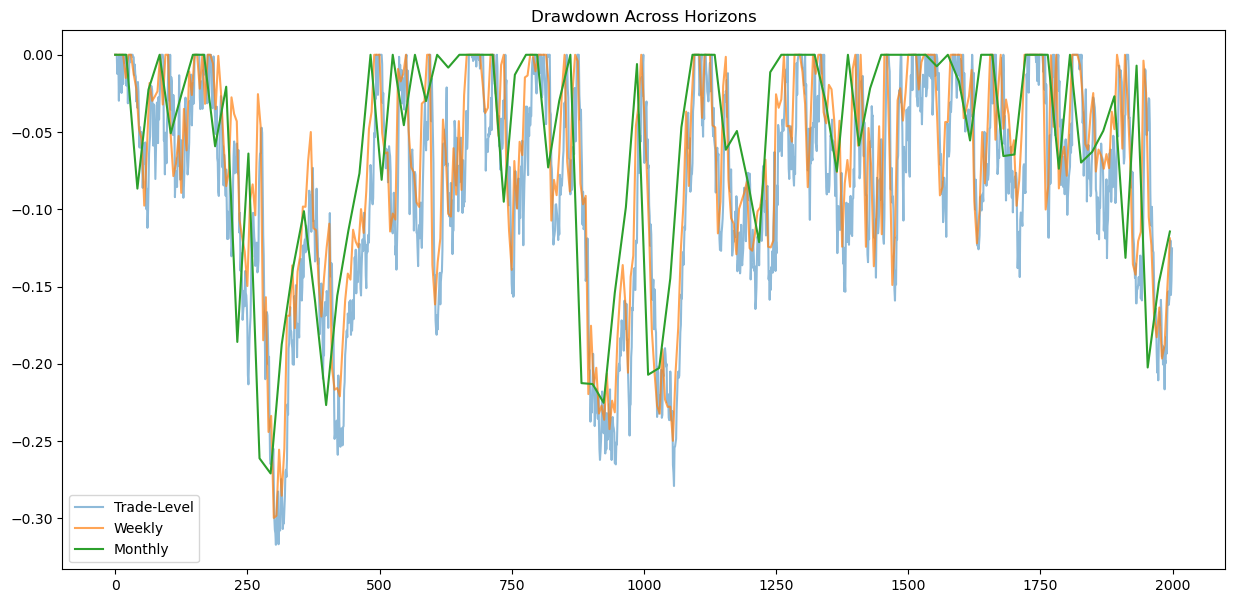

In [7]:
plt.figure(figsize=(15,7))
plt.plot(dd_trade, label="Trade-Level",  alpha = 0.5)
plt.plot(np.arange(0, len(dd_weekly)*5, 5), dd_weekly, label="Weekly", alpha = 0.7)
plt.plot(np.arange(0, len(dd_monthly)*21, 21), dd_monthly, label="Monthly")
plt.title("Drawdown Across Horizons")
plt.legend()
plt.show()

## Drawdown duration function

In [8]:
def drawdown_duration(drawdown_series):
    duration = 0
    max_duration = 0

    for dd in drawdown_series:
        if dd < 0:
            duration += 1
            max_duration = max(max_duration, duration)
        else:
            duration = 0

    return max_duration


In [9]:
print("Max Duration (Trade):", drawdown_duration(dd_trade))
print("Max Duration (Weekly):", drawdown_duration(dd_weekly))
print("Max Duration (Monthly):", drawdown_duration(dd_monthly))

Max Duration (Trade): 312
Max Duration (Weekly): 61
Max Duration (Monthly): 14


# Observations

1. The underlying stochastic process is identical across all horizons.
2. Maximum drawdown magnitude is similar in proportional terms, but visual perception differs.
3. Trade-level resolution shows frequent small drawdowns.
4. Weekly and monthly aggregation compress fluctuations, creating fewer but more prolonged drawdowns.
5. Drawdown duration changes depending on evaluation frequency.

Conclusion:
Perceived risk is strongly dependent on evaluation horizon.
The same system can feel more volatile or more stable purely due to sampling frequency.
No structural change occurred — only measurement resolution changed.